In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
matches_raw_df = pd.read_csv('matches.csv')

In [6]:
matches_raw_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
matches_raw_df.shape

(756, 18)

In [12]:
matches_raw_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [14]:
matches_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [15]:
# value_counts() returns a series which contains counts of unique values.
matches_raw_df.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [19]:
# Since there were 4 non result coolumns present and there is no requirement of umpire 3 for any further analysis hence dropping that column
matches_df = matches_raw_df.drop('umpire3', axis = 1)

In [20]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [22]:
# To find the matches played in each season and grouping them by season and counting the unique id of each match
matches_per_season = matches_df.groupby('season').id.count()
matches_per_season

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

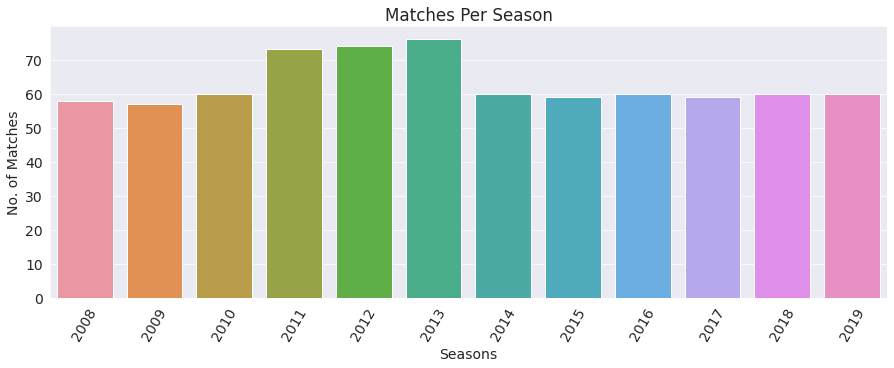

In [35]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=60)
plt.title('Matches Per Season')
match_per_season_plot = sns.barplot(x = matches_per_season.index, y = matches_per_season)
match_per_season_plot.set(xlabel = 'Seasons', ylabel = 'No. of Matches');

In [45]:
toss_decision_percentage = matches_df.groupby('season').toss_decision.value_counts().sort_index() / matches_per_season * 100

In [46]:
toss_decision_percentage

season  toss_decision
2008    bat              44.827586
        field            55.172414
2009    bat              61.403509
        field            38.596491
2010    bat              65.000000
        field            35.000000
2011    bat              34.246575
        field            65.753425
2012    bat              50.000000
        field            50.000000
2013    bat              59.210526
        field            40.789474
2014    bat              31.666667
        field            68.333333
2015    bat              42.372881
        field            57.627119
2016    bat              18.333333
        field            81.666667
2017    bat              18.644068
        field            81.355932
2018    bat              16.666667
        field            83.333333
2019    bat              16.666667
        field            83.333333
dtype: float64

In [47]:
toss_decision_percentage.index

MultiIndex([(2008,   'bat'),
            (2008, 'field'),
            (2009,   'bat'),
            (2009, 'field'),
            (2010,   'bat'),
            (2010, 'field'),
            (2011,   'bat'),
            (2011, 'field'),
            (2012,   'bat'),
            (2012, 'field'),
            (2013,   'bat'),
            (2013, 'field'),
            (2014,   'bat'),
            (2014, 'field'),
            (2015,   'bat'),
            (2015, 'field'),
            (2016,   'bat'),
            (2016, 'field'),
            (2017,   'bat'),
            (2017, 'field'),
            (2018,   'bat'),
            (2018, 'field'),
            (2019,   'bat'),
            (2019, 'field')],
           names=['season', 'toss_decision'])

In [48]:
# By using the unstack() method on the series, it converted the values of toss_decision (that is, bat and field) into separate columns.
toss_decision_percentage.unstack()

toss_decision,bat,field
season,,
2008,44.827586,55.172414
2009,61.403509,38.596491
2010,65.000000,35.000000
2011,34.246575,65.753425
2012,50.000000,50.000000
2013,59.210526,40.789474
2014,31.666667,68.333333
2015,42.372881,57.627119
2016,18.333333,81.666667


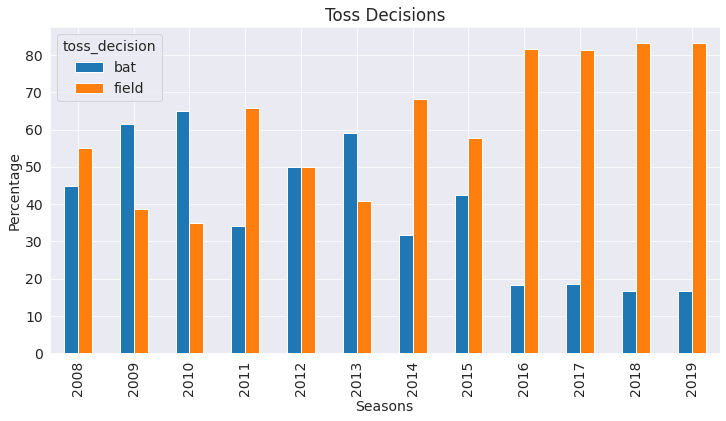

In [49]:
toss_decision_percentage.unstack().plot(kind = 'bar', figsize=(12,6), title = 'Toss Decisions', xlabel = 'Seasons', ylabel = 'Percentage');

In [51]:
filter1 = (matches_df.win_by_wickets == 0) & (matches_df.result == 'normal') 
filter1

0       True
1      False
2      False
3      False
4       True
       ...  
751    False
752    False
753    False
754    False
755     True
Length: 756, dtype: bool

In [52]:
wins_batting_first = matches_df[filter1].groupby('season').winner.count() / matches_per_season * 100
wins_batting_first

season
2008    41.379310
2009    47.368421
2010    51.666667
2011    45.205479
2012    45.945946
2013    48.684211
2014    36.666667
2015    54.237288
2016    35.000000
2017    44.067797
2018    46.666667
2019    36.666667
dtype: float64

In [53]:
filter2 = (matches_df.win_by_runs == 0) & (matches_df.result == 'normal')

In [54]:
wins_fielding_first = matches_df[filter2].groupby('season').winner.count() / matches_per_season * 100
wins_fielding_first

season
2008    58.620690
2009    50.877193
2010    46.666667
2011    53.424658
2012    54.054054
2013    48.684211
2014    61.666667
2015    40.677966
2016    65.000000
2017    54.237288
2018    53.333333
2019    58.333333
dtype: float64

In [55]:
# Combining the wins of both the paramteters
combined_wins_df = pd.concat([wins_batting_first, wins_fielding_first], axis = 1)
combined_wins_df.columns = ['batting_first', 'fielding_first']
combined_wins_df

,batting_first,fielding_first
season,,
2008,41.379310,58.620690
2009,47.368421,50.877193
2010,51.666667,46.666667
2011,45.205479,53.424658
2012,45.945946,54.054054
2013,48.684211,48.684211
2014,36.666667,61.666667
2015,54.237288,40.677966
2016,35.000000,65.000000


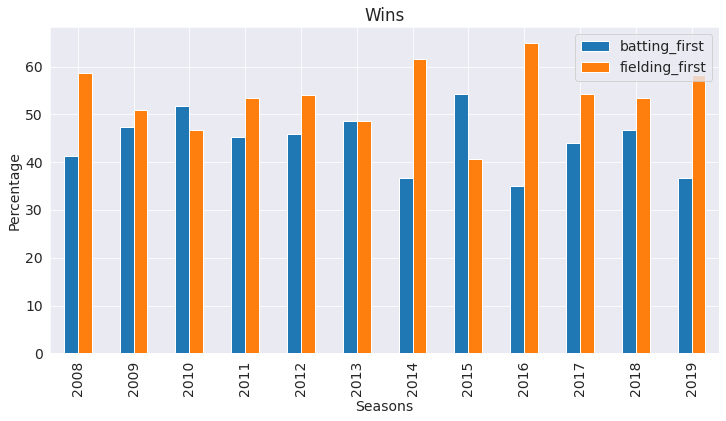

In [56]:
combined_wins_df.plot(kind = 'bar', figsize=(12,6), title = 'Wins', xlabel = 'Seasons', ylabel = 'Percentage');

In [60]:
total_matches_played = (matches_df.team2.value_counts() + matches_df.team1.value_counts()).sort_values(ascending = False)
total_matches_played

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Delhi Capitals                  16
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

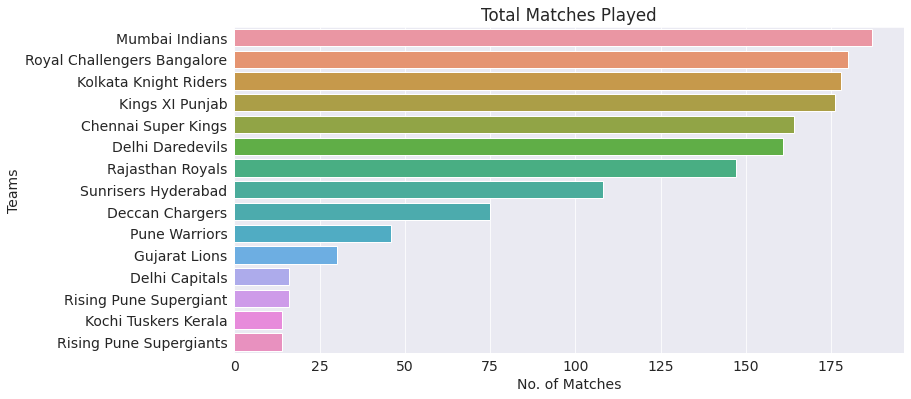

In [61]:
plt.figure(figsize=(12,6))
plt.title('Total Matches Played')
total_matches_played_plot = sns.barplot(y = total_matches_played.index, x = total_matches_played)
total_matches_played_plot.set(ylabel = 'Teams', xlabel = 'No. of Matches');

In [62]:
# This gives us the number of matches that each team has won.
most_wins = matches_df.winner.value_counts()
most_wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [63]:
win_percentage = (most_wins / total_matches_played).sort_values(ascending = False) * 100
win_percentage

Delhi Capitals                 62.500000
Rising Pune Supergiant         62.500000
Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Sunrisers Hyderabad            53.703704
Kolkata Knight Riders          51.685393
Rajasthan Royals               51.020408
Royal Challengers Bangalore    46.666667
Kings XI Punjab                46.590909
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
dtype: float64

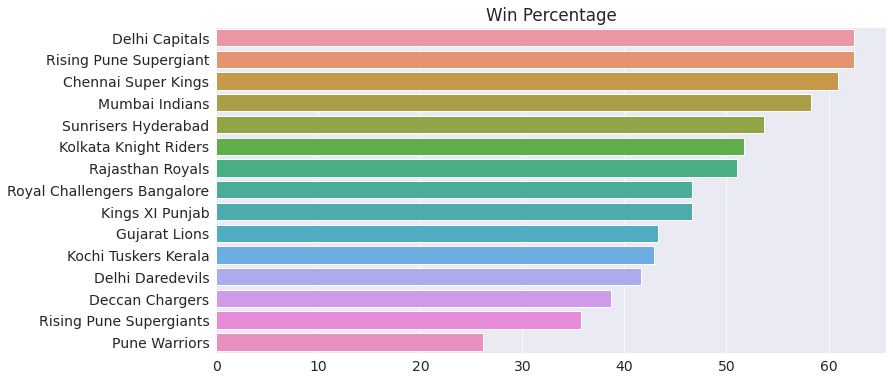

In [64]:
plt.figure(figsize=(12,6))
plt.title('Win Percentage')
win_percentage_plot = sns.barplot(y = win_percentage.index, x = win_percentage)
total_matches_played_plot.set(ylabel = 'Teams', xlabel = 'Percentage');

In [72]:
ipl_win = matches_df.groupby('season').tail(1).sort_values('season', ascending = True)
ipl_win[['city','date','team1','team2','toss_winner','toss_decision','result','dl_applied','winner','win_by_runs','win_by_wickets','player_of_match','venue']]
# ipl_win.columns('city','date','team1','team2','toss_winner','toss_decision','result','dl_applied','winner','win_by_runs','win_by_wickets','player_of_match','venue')

,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
116,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
233,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium
58,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"


In [73]:
ipl_winners = ipl_win.winner.value_counts()
ipl_winners

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

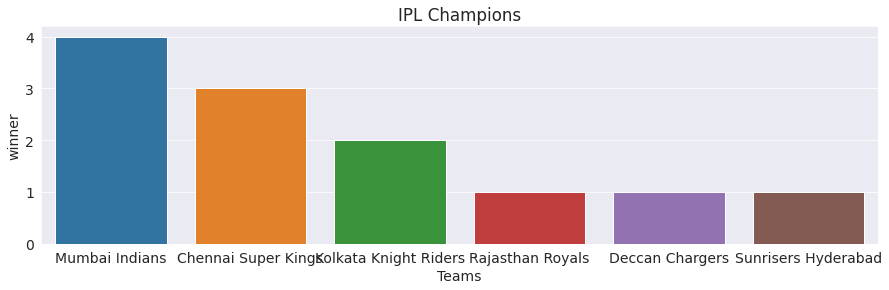

In [78]:
plt.figure(figsize=(15, 4))
plt.xlabel('Teams')
plt.ylabel('No. of Times')
plt.title('IPL Champions')
sns.barplot( x  = ipl_winners.index, y = ipl_winners);

In [80]:
# Both the syntax are fine.
# crosstab is like crossjoin in sql where we can create a cross table and compare with 2 columns 


# matches_won_each_season = pd.crosstab(matches_df['winner'], matches_df['season'])
matches_won_each_season = pd.crosstab(matches_df.winner, matches_df.season)
matches_won_each_season

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
winner,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0
Delhi Capitals,0,0,0,0,0,0,0,0,0,0,0,10
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6,5,0
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11


In [81]:
matches_won_each_season = pd.crosstab(matches_df['winner'], matches_df['season'])
matches_won_each_season

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
winner,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0
Delhi Capitals,0,0,0,0,0,0,0,0,0,0,0,10
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6,5,0
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11


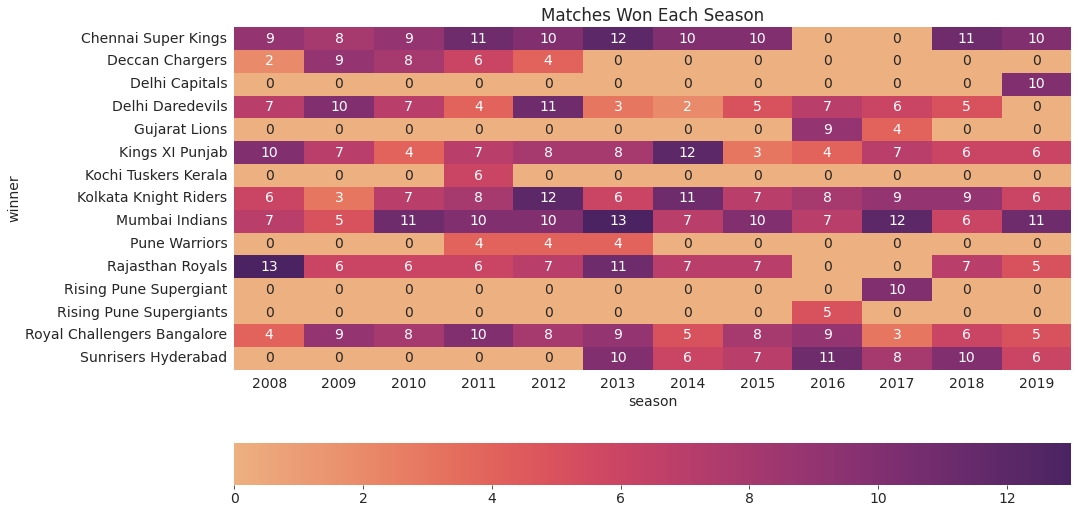

In [82]:
plt.figure(figsize=(15, 9))
plt.xlabel('Seasons')
plt.ylabel('Teams')
plt.title('Matches Won Each Season')
sns.heatmap(matches_won_each_season, annot = True, cmap = 'flare', fmt = 'd', cbar_kws={"orientation": "horizontal"});

In [85]:
highest_wins_by_runs_df = matches_raw_df[matches_raw_df.win_by_runs != 0].sort_values('win_by_runs', ascending = False)
highest_wins_by_runs_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
556,557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
410,411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
614,615,2016,Chandigarh,2016-05-09,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,1,0,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,HDPK Dharmasena,NaN
598,599,2016,Delhi,2016-04-27,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Gujarat Lions,1,0,CH Morris,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
163,164,2009,Johannesburg,2009-05-17,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,normal,0,Kings XI Punjab,1,0,Yuvraj Singh,New Wanderers Stadium,S Ravi,RB Tiffin,NaN


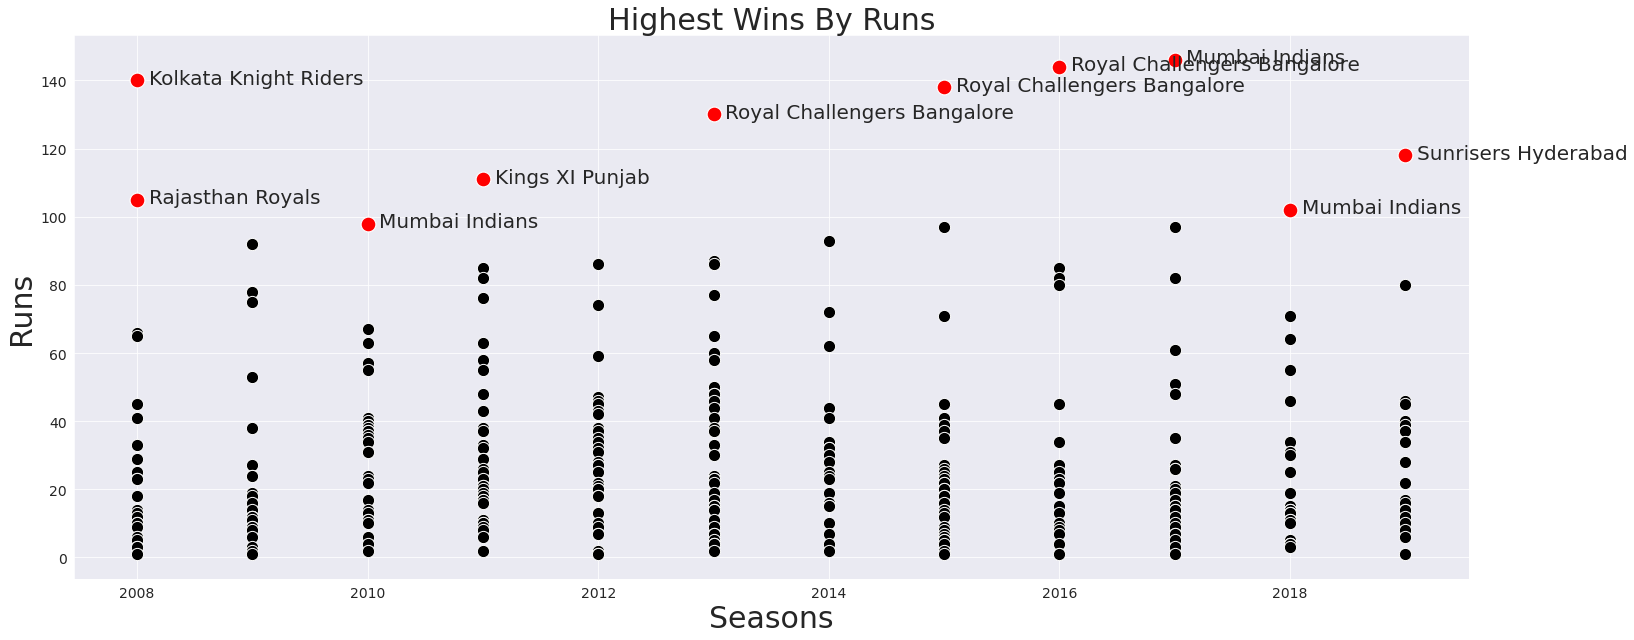

In [86]:
plt.figure(figsize=(25, 10))
plt.xlabel('Seasons',size=30)
plt.ylabel('Runs',size=30)
plt.title('Highest Wins By Runs', size = 30)
sns.scatterplot(x = 'season',y =  'win_by_runs', data = highest_wins_by_runs_df, s =150, color = 'black');
sns.scatterplot(x = 'season',y =  'win_by_runs', data = highest_wins_by_runs_df.head(10), s =220, color = 'red');
for i in range(highest_wins_by_runs_df.head(10).shape[0]):
    plt.annotate(highest_wins_by_runs_df.winner.tolist()[i], (highest_wins_by_runs_df.season.tolist()[i]+0.1, highest_wins_by_runs_df.win_by_runs.tolist()[i] - 1) , size = 20)

In [88]:
mivcsk_df = matches_df[((matches_df.team1 == 'Mumbai Indians') & (matches_df.team2 == 'Chennai Super Kings')) | ((matches_df.team1 == 'Chennai Super Kings') & (matches_df.team2 == 'Mumbai Indians')) ]

In [89]:
mivcsk = mivcsk_df.winner.value_counts()
mivcsk

Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64

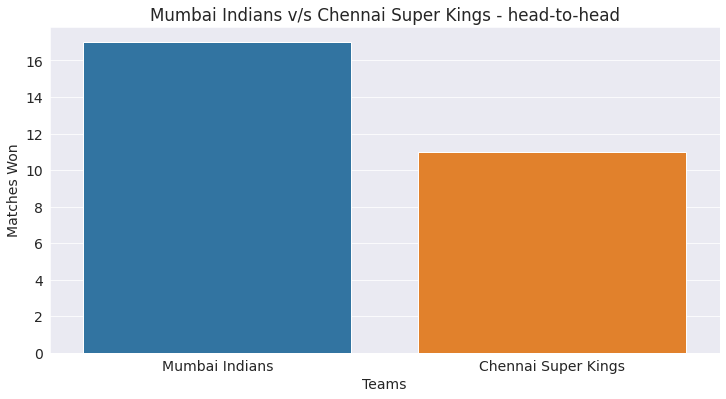

In [90]:
plt.figure(figsize=(12,6))
plt.title('Mumbai Indians v/s Chennai Super Kings - head-to-head')
mivcsk_plot = sns.barplot(x = mivcsk.index, y = mivcsk);
mivcsk_plot.set(xlabel = 'Teams', ylabel = 'Matches Won');